In [1]:
# Problem 1

In [2]:
# import the necessary libraries
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
%matplotlib inline

### Calculate Manually 

In [3]:
data = pd.read_csv("HW3Q1data.csv")
X = data[['Per Capita Income','Proportion of population on farms','Infant Mortality Rate']]
Y = data['Birth Rate']

In [4]:
X.head(3)

,Per Capita Income,Proportion of population on farms,Infant Mortality Rate
0,392,0.40,68.5
1,118,0.61,87.8
2,44,0.53,115.8


In [5]:
Y.head(3)

0    46.4
1    45.7
2    45.3
Name: Birth Rate, dtype: float64

##### The approach you took isright for scaling, I am just lazy and using StandardScaler 

In [6]:
sc = StandardScaler()
X = pd.DataFrame(data = sc.fit_transform(X),
                 columns = X.columns)

In [7]:
X.head(3)

,Per Capita Income,Proportion of population on farms,Infant Mortality Rate
0,-0.330935,0.404063,0.524116
1,-1.048819,1.604428,1.183325
2,-1.242700,1.147146,2.139691


##### Adding dummy variable to account for Intercept called "Coef" 

In [8]:
X['Coef'] = 1
X = X[['Coef','Per Capita Income','Proportion of population on farms','Infant Mortality Rate']]
X.head()

,Coef,Per Capita Income,Proportion of population on farms,Infant Mortality Rate
0,1,-0.330935,0.404063,0.524116
1,1,-1.048819,1.604428,1.183325
2,1,-1.242700,1.147146,2.139691
3,1,-0.944019,1.147146,1.832288
4,1,-1.145760,1.147146,0.630000


### Functions Defined : No Change 

In [9]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B)-Y) ** 2)/(2 * m)
    return J

In [10]:
def batch_gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
 
    for iteration in range(iterations):
        # print(iteration)
        # Hypothesis Values
        h = X.dot(B)
#         print(h)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
#         print(gradient)
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost 
 
    return B, cost_history

### We want to be careful here and selecting starting weights is cruicial

##### I started with B[0] = 1 and and it never reachd 24 but starting with 20 appears to have worked (Cheating!!)

In [11]:
B = [20,2,1,3]
alpha = .01
iter_ = 1000

newB, cost_history = batch_gradient_descent(X, Y, B, alpha, iter_)

##### Technically we only need ~500 epochs but why not? 

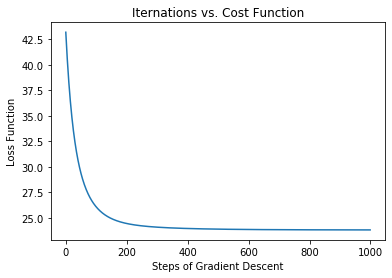

In [12]:
x_axis = np.arange(0,iter_)
plt.plot(x_axis,cost_history)
plt.ylabel('Loss Function')
plt.xlabel('Steps of Gradient Descent')
plt.title('Iternations vs. Cost Function')
plt.show()

### Get the Co-effs 

In [13]:
print(newB)

Coef                                 24.637731
Per Capita Income                     1.958432
Proportion of population on farms     1.523663
Infant Mortality Rate                 6.851245
dtype: float64


### Make a test prediction 

In [14]:
test_pred = [[993, 0.19, 33.7]]

In [15]:
scaled_test = sc.transform(test_pred)
final_input = list([1])
final_input.extend(scaled_test[0])
print(np.array(final_input).reshape(-1,1).T.dot(newB))

[21.30741251]


### Confirming with SKLEARN 

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
data = pd.read_csv("HW3Q1data.csv")
X = data[['Per Capita Income','Proportion of population on farms','Infant Mortality Rate']]
Y = data['Birth Rate']
X = pd.DataFrame(data = sc.transform(X),
                 columns = X.columns)

In [18]:
lr = LinearRegression()

In [19]:
lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
lr.coef_

array([2.11083984, 1.53860127, 6.99404974])

In [21]:
lr.intercept_

24.637931034482754